In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import seaborn as sns

In [2]:
df_train = pd.read_csv('D:/DataScience/ML/Kaggle/HousePricing/train.csv')
df_train.head()
df_train.shape

df_test = pd.read_csv('D:/DataScience/ML/Kaggle/HousePricing/test.csv')
df_test.head()
df_test.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

In [3]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


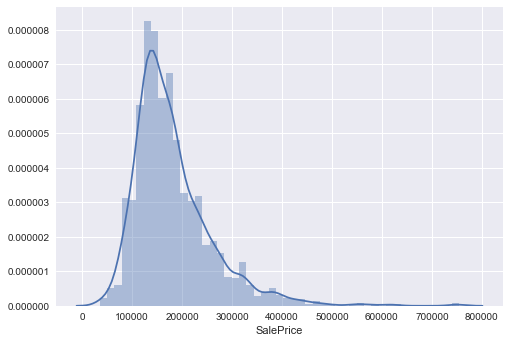

In [4]:
sns.distplot(df_train.SalePrice)

In [5]:
print("Skewness is %f" % df_train.SalePrice.skew())
print("Kurtosis is %f" % df_train.SalePrice.kurt())

Skewness is 1.882876
Kurtosis is 6.536282


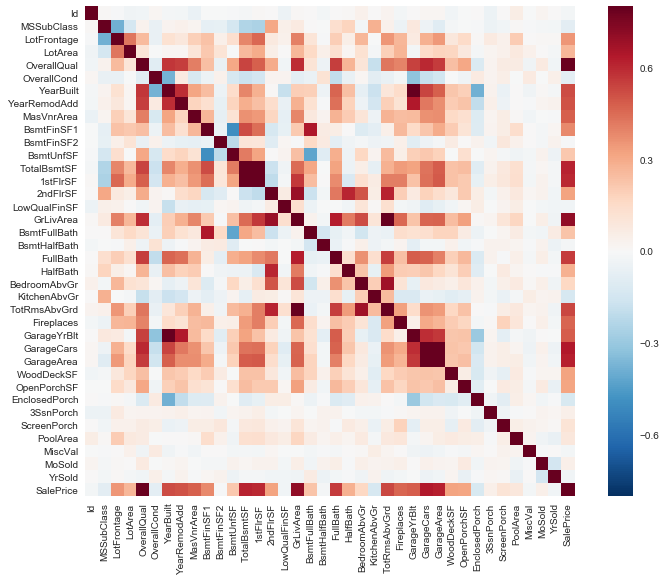

In [6]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

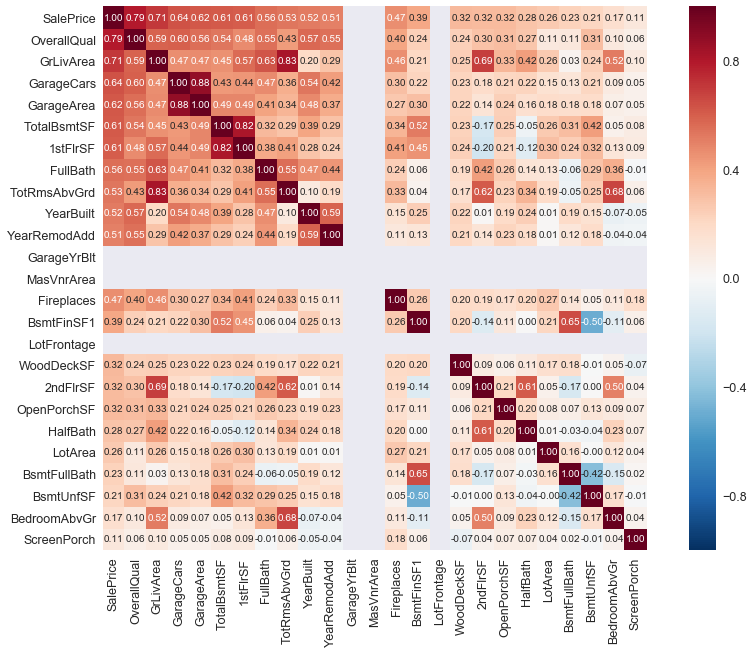

In [7]:
k = 25
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize = (15,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

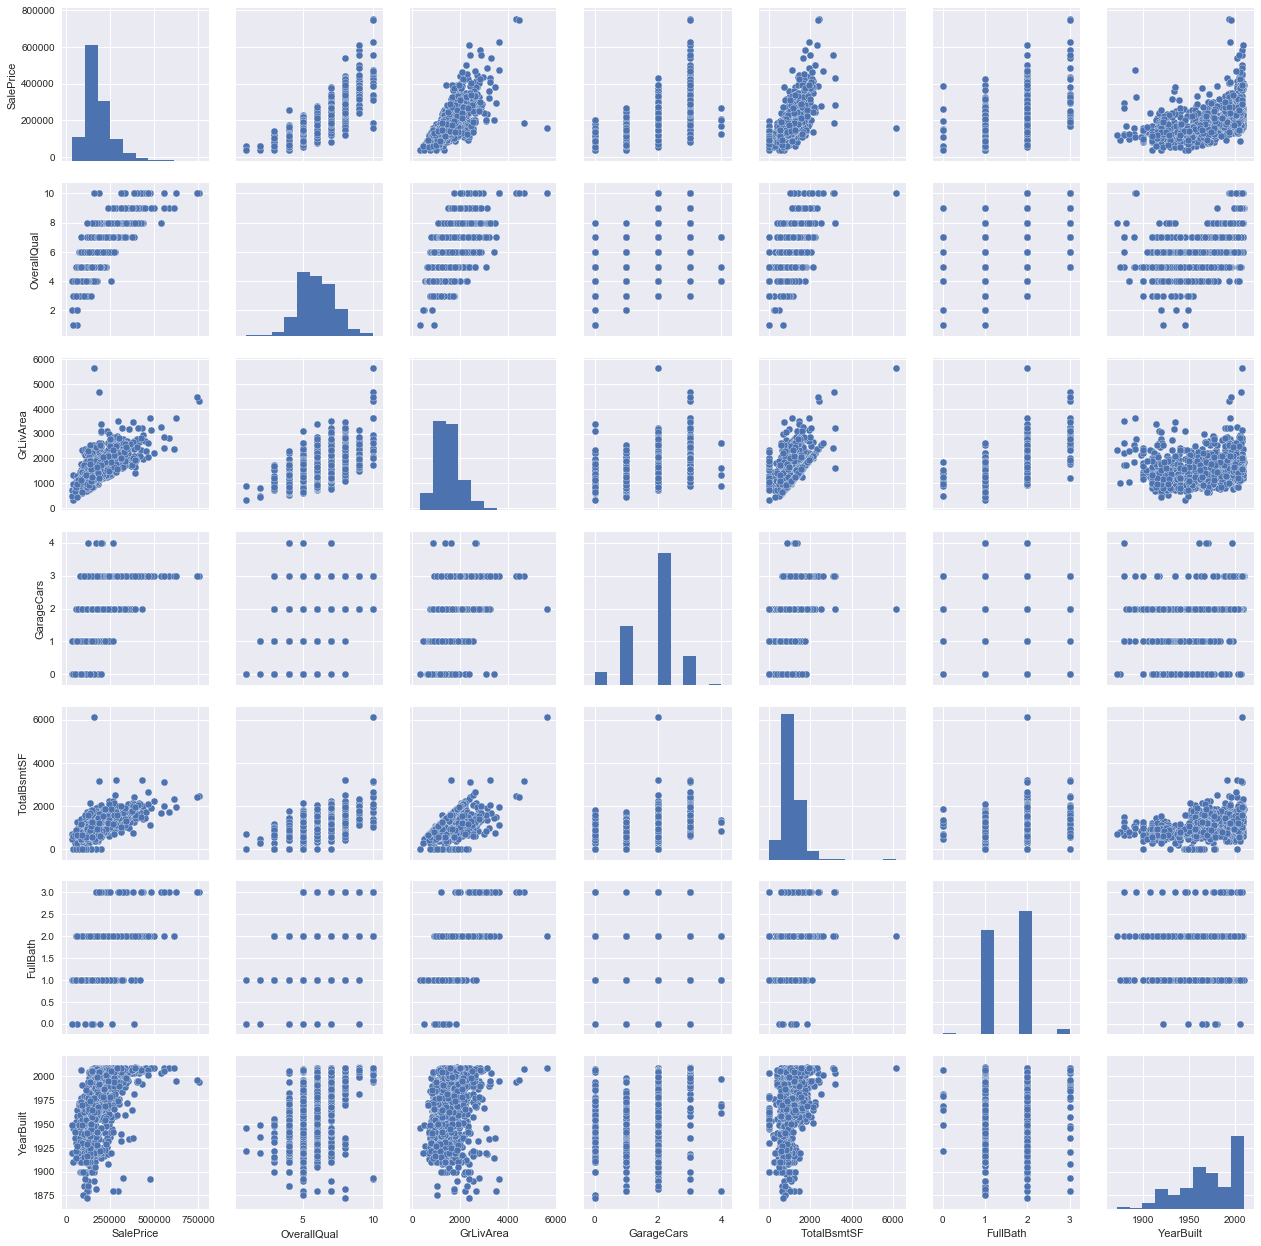

In [8]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'BsmtQual', 'TotalBsmtSF', 'FullBath', 'FireplaceQu', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5, )
plt.show();

In [9]:
null_cols = df_train.columns[df_train.isnull().any()]
df_train[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
df_train[['LotFrontage']] = df_train[['LotFrontage']].fillna(df_train.mean())
df_train.MasVnrArea.fillna(0, inplace=True)
df_train.MasVnrType.fillna('None', inplace=True)
df_train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=df_train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No')
df_train[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]=df_train[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].fillna('No')
df_train[['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']]=df_train[['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']].fillna('No')
df_train.dropna(subset=['Electrical'], axis=0, how='any', inplace=True)

In [11]:
df_train.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

In [12]:
df_train[null_cols].isnull().sum().max()

0

In [13]:
df_train.shape

(1459, 81)

In [14]:
df_train['ExterCond'] = df_train.ExterCond.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_train['ExterQual'] = df_train.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex': 4})
df_train['BsmtQual'] = df_train.BsmtQual.map({'No':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_train['BsmtCond'] = df_train.BsmtCond.map({'No': 0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3})
df_train['BsmtExposure'] = df_train.BsmtExposure.map({'No': 0, 'Mn':1, 'Av':2, 'Gd':3})
df_train['HeatingQC'] = df_train.HeatingQC.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_train['KitchenQual'] = df_train.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex': 4})
df_train['FireplaceQu'] = df_train.FireplaceQu.map({'No': 0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_train['GarageQual'] = df_train.GarageQual.map({'No': 0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_train['GarageCond'] = df_train.GarageCond.map({'No':0,'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_train['PoolQC'] = df_train.PoolQC.map({'No': 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex': 4})

In [15]:
df_train = pd.get_dummies(df_train, columns=['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature'], drop_first=True)

In [16]:
df_train.shape

(1459, 230)

In [17]:
#deleting outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
1298,1299,313.0,63887,10,5,2008,2008,796.0,4,2,...,0,1,0,0,0,1,1,0,0,0
523,524,130.0,40094,10,5,2007,2008,762.0,4,2,...,0,1,0,0,0,1,1,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


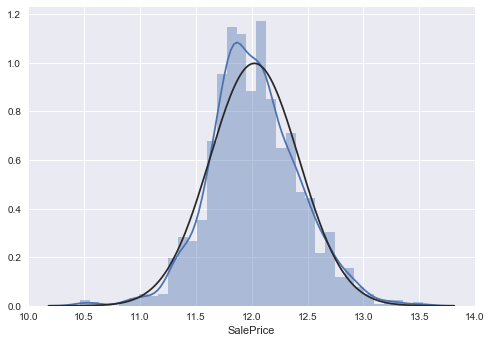

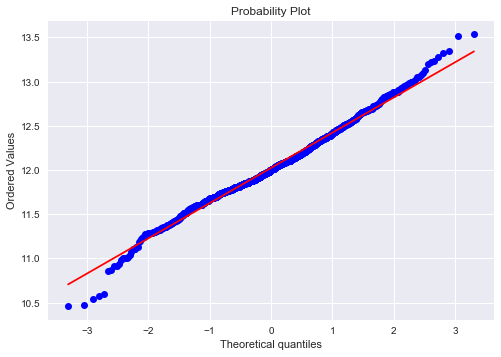

In [18]:
from scipy import stats
from scipy.stats import norm
df_train['SalePrice']=np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


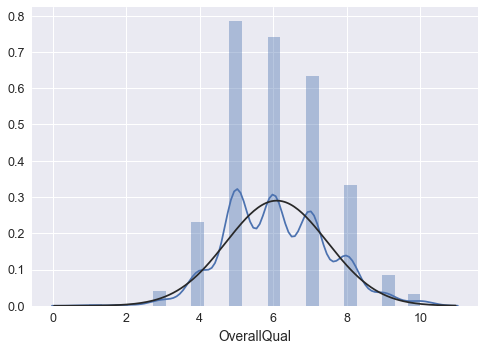

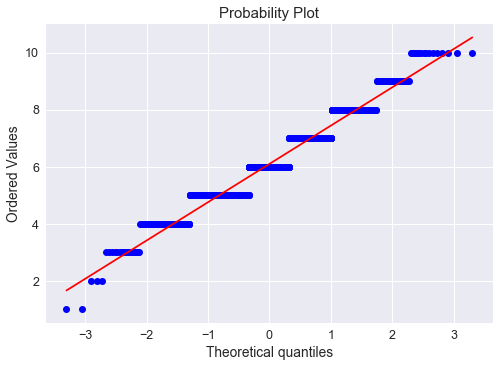

In [826]:
#df_train['SalePrice']=np.log(df_train['SalePrice'])
sns.distplot(df_train['OverallQual'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['OverallQual'], plot=plt)

In [ ]:
#OverallQual, GrLivArea, ExterQual, GarageCars, BsmtQual, TotalBsmtSF, FullBath, FirePlaceQu, YearBuilt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


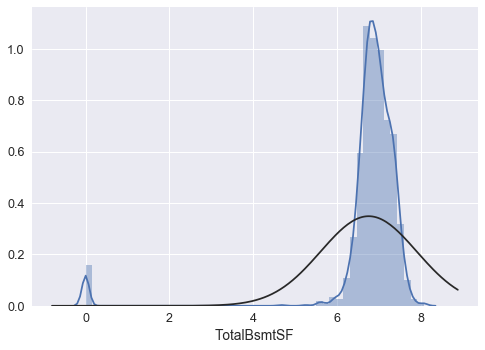

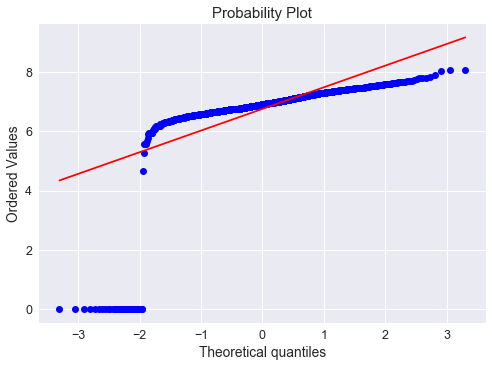

In [827]:
df_train['TotalBsmtSF'] = np.log1p(df_train['TotalBsmtSF'])
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


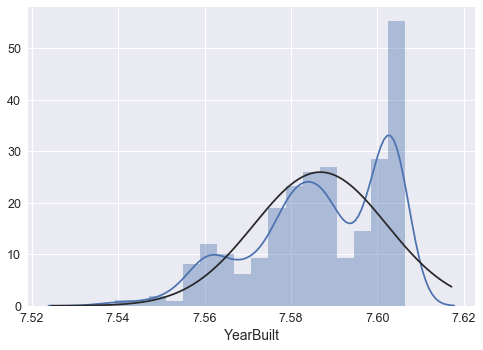

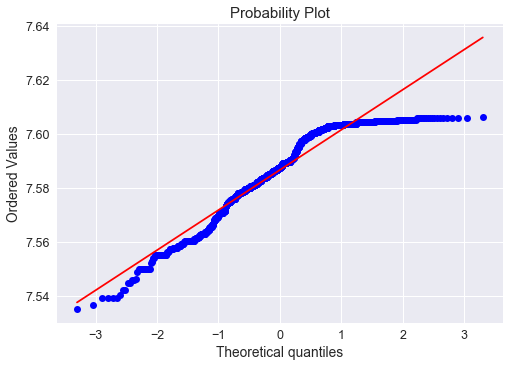

In [828]:
df_train['YearBuilt'] = np.log1p(df_train['YearBuilt'])
sns.distplot(df_train['YearBuilt'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['YearBuilt'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


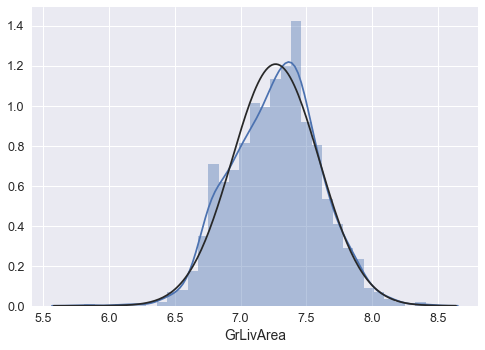

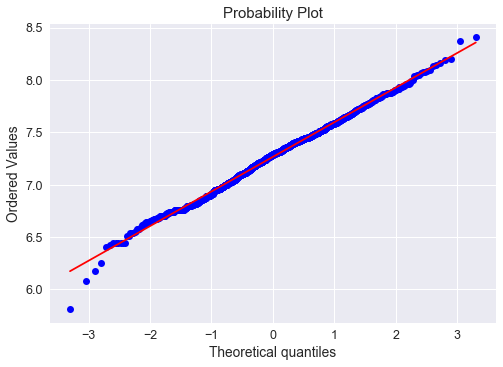

In [829]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [19]:
df_test[['LotFrontage']] = df_test[['LotFrontage']].fillna(df_test.mean())
df_test.MasVnrArea.fillna(0, inplace=True)
df_test.MasVnrType.fillna('None', inplace=True)
df_test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=df_test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No')
df_test[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]=df_test[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].fillna('No')
df_test[['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']]=df_test[['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']].fillna('No')
df_test.dropna(subset=['Electrical'], axis=0, how='any', inplace=True)
df_test.GarageCars.fillna(0, inplace=True)
df_test.TotalBsmtSF.fillna(0, inplace=True)
df_test.KitchenQual.fillna(2, inplace=True)
df_test.BsmtFinSF1.fillna(0, inplace=True)

In [20]:
df_test['ExterCond'] = df_test.ExterCond.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['ExterQual'] = df_test.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex': 4})
df_test['BsmtQual'] = df_test.BsmtQual.map({'No':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['BsmtCond'] = df_test.BsmtCond.map({'No': 0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3})
df_test['BsmtExposure'] = df_test.BsmtExposure.map({'No': 0, 'Mn':1, 'Av':2, 'Gd':3})
df_test['HeatingQC'] = df_test.HeatingQC.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['KitchenQual'] = df_test.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex': 4})
df_test['FireplaceQu'] = df_test.FireplaceQu.map({'No': 0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['GarageQual'] = df_test.GarageQual.map({'No': 0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['GarageCond'] = df_test.GarageCond.map({'No':0,'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['PoolQC'] = df_test.PoolQC.map({'No': 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex': 4})

In [21]:
df_test = pd.get_dummies(df_test, columns=['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature'], drop_first=True)

In [833]:
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
df_test['TotalBsmtSF'] = np.log1p(df_test['TotalBsmtSF'])
df_test['YearBuilt'] = np.log1p(df_test['YearBuilt'])

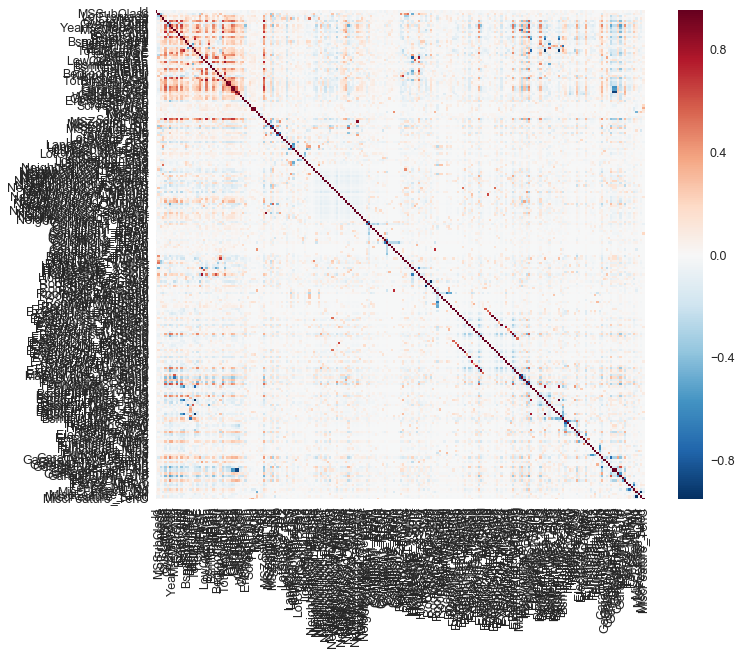

In [834]:
corrmat1 = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

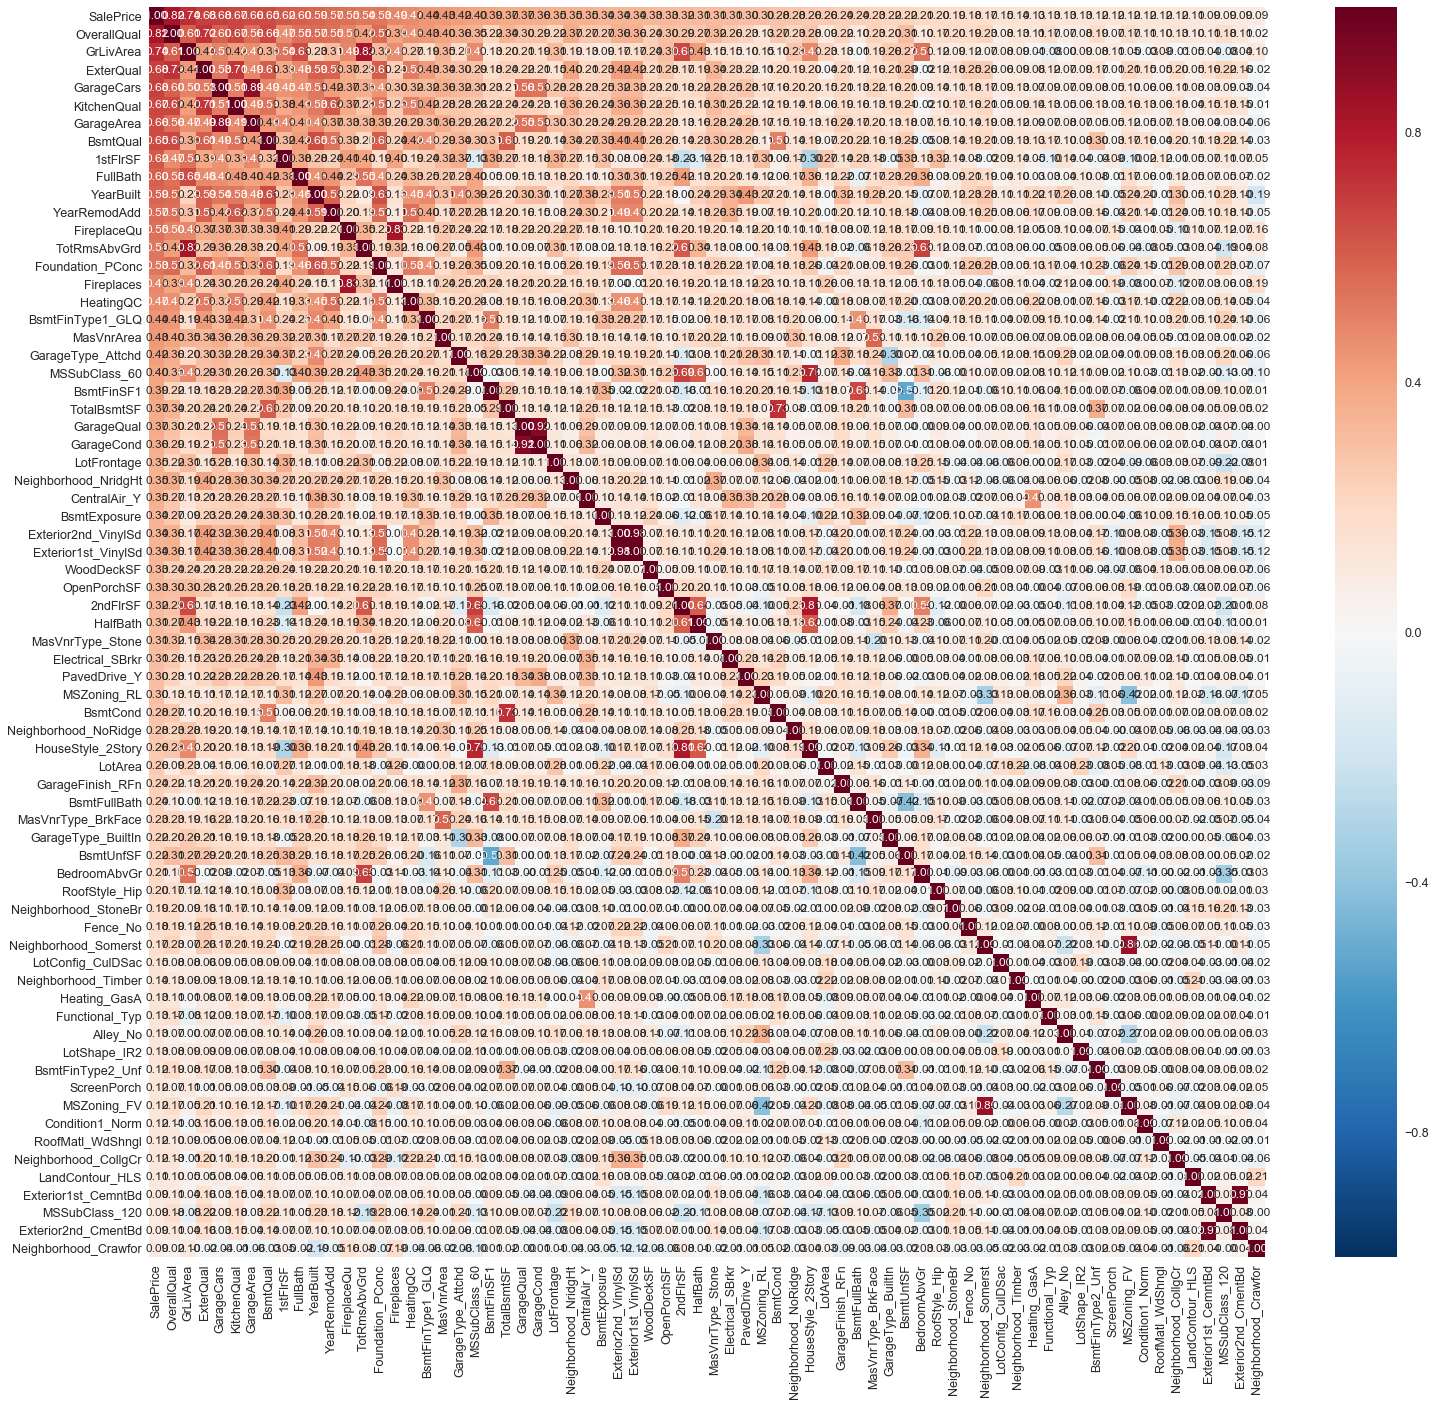

In [835]:
k = 70
cols = corrmat1.nlargest(k, 'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize = (25,23))
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [836]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars',
       'KitchenQual', 'GarageArea', 'BsmtQual', '1stFlrSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'FireplaceQu', 'TotRmsAbvGrd',
       'Foundation_PConc', 'Fireplaces', 'HeatingQC', 'BsmtFinType1_GLQ',
       'MasVnrArea', 'GarageType_Attchd', 'MSSubClass_60', 'BsmtFinSF1',
       'TotalBsmtSF', 'GarageQual', 'GarageCond', 'LotFrontage',
       'Neighborhood_NridgHt', 'CentralAir_Y', 'BsmtExposure',
       'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'WoodDeckSF',
       'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'MasVnrType_Stone',
       'Electrical_SBrkr', 'PavedDrive_Y', 'MSZoning_RL', 'BsmtCond',
       'Neighborhood_NoRidge', 'HouseStyle_2Story', 'LotArea',
       'GarageFinish_RFn', 'BsmtFullBath', 'MasVnrType_BrkFace',
       'GarageType_BuiltIn', 'BsmtUnfSF', 'BedroomAbvGr', 'RoofStyle_Hip',
       'Neighborhood_StoneBr', 'Fence_No', 'Neighborhood_Somerst',
       'LotConfig_CulDSac', 'Neighborh

In [654]:
#y=target
feature_cols=['OverallQual', 'BsmtQual','GarageQual','FireplaceQu','ExterQual', 'KitchenQual','HeatingQC','GarageCond',
              'GrLivArea','1stFlrSF','MasVnrArea','LotFrontage','BsmtFinSF1','TotalBsmtSF','WoodDeckSF','OpenPorchSF','2ndFlrSF','LotArea','BsmtUnfSF',
               'FullBath','HalfBath','BsmtFullBath',
              'BsmtFinType1_GLQ','BsmtExposure',
              'GarageType_Attchd','GarageCars','GarageFinish_RFn','GarageType_BuiltIn',
              'Neighborhood_NridgHt','Neighborhood_NoRidge','Neighborhood_StoneBr',
              'MasVnrType_Stone','MasVnrType_BrkFace',
              'YearBuilt','YearRemodAdd',
              'Foundation_PConc','CentralAir_Y','Exterior2nd_VinylSd','Electrical_SBrkr','PavedDrive_Y', 'MSZoning_RL',
              'BedroomAbvGr', 'RoofStyle_Hip','MSSubClass_60','Fence_No', 
       'Neighborhood_Somerst', 'LotConfig_CulDSac', 'Neighborhood_Timber',
       'Heating_GasA', 'Functional_Typ', 'Alley_No', 'LotShape_IR2',
       'BsmtFinType2_Unf', 'ScreenPorch', 'MSZoning_FV', 'Condition1_Norm',
       'RoofMatl_WdShngl', 'Neighborhood_CollgCr', 'LandContour_HLS',
       'Exterior1st_CemntBd', 'MSSubClass_120', 'Exterior2nd_CmentBd',
       'Neighborhood_Crawfor']

In [899]:
def train_test_rmse(feature_cols):
    X = df_train[feature_cols]
    y = df_train.SalePrice
    df_lm = linear_model.LinearRegression()
    df_lm.fit(X,y)
    df_score = cross_val_score(df_lm, X, y, cv=5, scoring='neg_mean_squared_error')
    df_score_mean = str(np.sqrt(abs(df_score)).mean())
    return df_score_mean

In [900]:
print (train_test_rmse(['OverallQual','KitchenQual', 'GarageQual','FireplaceQu','ExterQual','HeatingQC',
              'GrLivArea','1stFlrSF','MasVnrArea','LotFrontage','BsmtFinSF1','TotalBsmtSF','WoodDeckSF','OpenPorchSF','2ndFlrSF','LotArea',
               'BsmtExposure','BsmtFinType2_Unf',
              'GarageCars',
              'Neighborhood_NridgHt','Neighborhood_StoneBr','Neighborhood_Somerst',
              'MasVnrType_BrkFace',
              'YearBuilt','YearRemodAdd',
              'Foundation_PConc','CentralAir_Y','MSZoning_RL','LotConfig_CulDSac','Functional_Typ','ScreenPorch','MSZoning_FV',
              'Condition1_Norm','Neighborhood_Crawfor'
              ]))

0.121920278837


In [907]:
feature_cols=['OverallQual','KitchenQual', 'GarageQual','FireplaceQu','ExterQual','HeatingQC',
              'GrLivArea','1stFlrSF','MasVnrArea','LotFrontage','BsmtFinSF1','TotalBsmtSF','WoodDeckSF','OpenPorchSF','2ndFlrSF','LotArea',
               'BsmtExposure','BsmtFinType2_Unf',
              'GarageCars',
              'Neighborhood_NridgHt','Neighborhood_StoneBr','Neighborhood_Somerst',
              'MasVnrType_BrkFace',
              'YearBuilt','YearRemodAdd',
              'Foundation_PConc','CentralAir_Y','MSZoning_RL','LotConfig_CulDSac','Functional_Typ','ScreenPorch','MSZoning_FV',
              'Condition1_Norm','Neighborhood_Crawfor']
X = df_train[feature_cols]
y = df_train.SalePrice
df_lm = linear_model.LinearRegression()
df_lm.fit(X,y)
df_score = cross_val_score(df_lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(str(np.sqrt(abs(df_score)).mean()))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.121920278837


In [908]:
y_pred=df_lm.predict(df_test[feature_cols])

In [909]:
predicted_prices = list(np.exp(y_pred))

In [910]:
predicted_prices

[107683.10736647859,
 157189.64294939407,
 178097.62049396511,
 193086.88051762502,
 208320.86928673252,
 171040.41128675605,
 177185.23055508148,
 161250.95866399855,
 193411.77583504794,
 120424.05873071836,
 186357.58757476782,
 106073.16297610225,
 101752.8270860112,
 152162.29506132906,
 120611.22333606899,
 346168.69545244117,
 239092.10230638675,
 276068.32421207119,
 269918.02144960436,
 502478.66475495941,
 338571.27280997887,
 217287.774607028,
 177026.99347778954,
 169906.39703828099,
 186102.27134312087,
 201483.12833804349,
 309269.16497878986,
 237359.29498879964,
 188033.69250244251,
 238937.5119615538,
 197656.57119388675,
 87109.665645683446,
 185533.21277110357,
 276700.8601971622,
 286828.39919525542,
 245214.70701733604,
 192435.59497617034,
 174114.45001625098,
 175553.41708936583,
 161882.2474973503,
 186927.82498250666,
 164804.20427488157,
 257382.60959320221,
 247347.74263384732,
 232813.4431498562,
 177408.83322429325,
 259353.5396496279,
 197069.41334549338,


In [911]:
csv = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predicted_prices})
csv.to_csv('HousePrices.csv', index=False)